In [1]:
!pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/26/5d/1e13b597ed8e54803e9ac6ded18c04cd35d8cbc49016778ec50c4ca9e9d5/plotly-5.16.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/15.6 MB 13.8 kB/s eta 0:13:36
ERROR: Exception:
Traceback (most recent call last):
  File "/home/clickgreen/celestial_mechanics/.venv/lib/python3.10/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/home/clickgreen/celestial_mechanics/.venv/lib/python3.10/site-packages/pip/_vendor/urllib3/response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "/home/clickgreen/celestial_mechanics/.venv/lib/python3.10/site-packages/pip/_vendor/urllib3/response.py", line 

In [5]:
from astroquery.jplhorizons import Horizons

In [6]:
earth_busca=Horizons(id='Geocenter',location='@Sun',
          epochs=dict(start='2023-08-08 19:45:23',stop='2023-08-08 19:45:24',step='1d'))

In [7]:
earth_busca.vectors().to_pandas()

,targetname,datetime_jd,datetime_str,x,y,z,vx,vy,vz,lighttime,range,range_rate
0,Earth (399),2.460165e+06,A.D. 2023-Aug-08 19:45:23.0000,0.725594,-0.708318,0.000032,0.011743,0.012241,-0.000001,0.005856,1.014002,-0.000148


In [8]:
from astropy import constants
Au=constants.au.value
Msun= constants.M_sun.value
Msun

1.988409870698051e+30

# Ahora vamos a dibujar la orbita de la tierra

In [2]:
import numpy as np
import pandas as pd
from astroquery.jplhorizons import Horizons
import matplotlib.pyplot as plt

In [5]:
Posicion_terrestre=Horizons(id='Geocenter',location='0',
          epochs=dict(start='1900-01-01 00:00:01',stop='2023-12-31 23:59:59',step='90d')).vectors().to_pandas()

In [8]:
Posicion_terrestre.columns

Index(['targetname', 'datetime_jd', 'datetime_str', 'x', 'y', 'z', 'vx', 'vy',
       'vz', 'lighttime', 'range', 'range_rate'],
      dtype='object')

(-2.9365679788155296e-05,
 2.9608972566974304e-05,
 -4.006258672554345e-05,
 1.3654984555235996e-05)

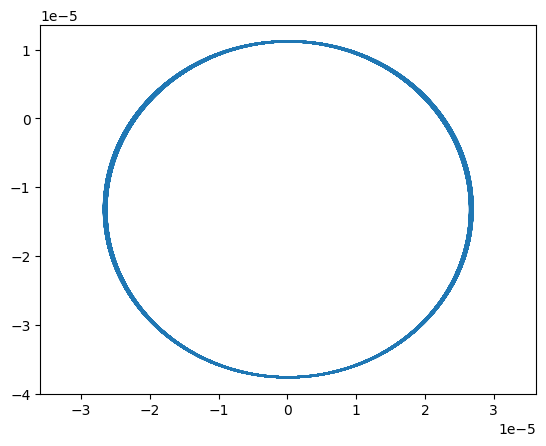

In [12]:
plt.plot(Posicion_terrestre['x'].tolist(),Posicion_terrestre['y'].tolist())
plt.axis('equal')

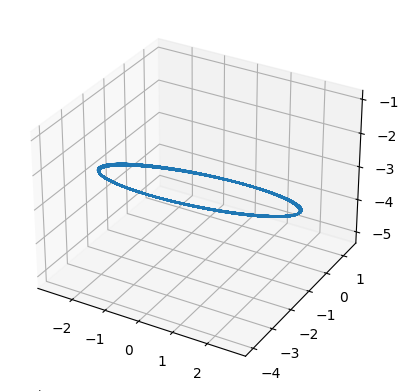

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importar el módulo de gráficos 3D

# Crear una figura en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Obtener los valores de las columnas x, y, z como listas
x_values = Posicion_terrestre['x'].tolist()
y_values = Posicion_terrestre['y'].tolist()
z_values = Posicion_terrestre['z'].tolist()

# Crear el gráfico en 3D
ax.plot(x_values, y_values, z_values)

# Configurar ejes iguales
ax.axis('equal')

# Mostrar el gráfico
plt.show()


Aceleración de la luna

In [14]:
#constans
G=constants.G.value
au=constants.au.value
musun=G*constants.M_sun.value
muearth=G*constants.M_earth.value

In [15]:
Posicion_terrestre=Horizons(id='Geocenter',location='@0',
          epochs=dict(start='2023-01-01 00:00:01',stop='2023-12-31 23:59:59',step='1d')).vectors().to_pandas()
r_earth=np.array(Posicion_terrestre[['x','y','z']]*au)

sun=Horizons(id='10',location='@0',
          epochs=dict(start='2023-01-01 00:00:01',stop='2023-12-31 23:59:59',step='1d')).vectors().to_pandas()
r_sun=np.array(sun[['x','y','z']]*au)

moon=Horizons(id='301',location='@0',
          epochs=dict(start='2023-01-01 00:00:01',stop='2023-12-31 23:59:59',step='1d')).vectors().to_pandas()
r_moon= np.array(moon[['x','y','z']]*au)

r_moon

array([[-2.64991067e+10,  1.45111529e+11,  1.92081230e+07],
       [-2.91223885e+10,  1.44700389e+11,  2.68032076e+07],
       [-3.17503811e+10,  1.44230711e+11,  3.42695071e+07],
       ...,
       [-1.84351697e+10,  1.46034561e+11,  5.74707179e+07],
       [-2.10998825e+10,  1.45656435e+11,  5.59138786e+07],
       [-2.37462396e+10,  1.45219439e+11,  5.28425700e+07]])

In [16]:
r31s=r_moon-r_sun
r32s=r_moon-r_earth

In [17]:
r31=np.linalg.norm(r31s,axis=1)
r32=np.linalg.norm(r32s,axis=1)

In [18]:
N=len(r32)
a3s=np.zeros((N,3))
for i in range(N):
  a3s[i]=-musun*r31s[i,:]/r31[i]**3 -muearth*r32s[i,:]/r32[i]**3

In [19]:
a3s

array([[-1.14985371e-03, -7.47280900e-03,  3.36977623e-05],
       [-6.35903581e-04, -7.85055920e-03, -1.75607845e-05],
       [-6.65092831e-05, -8.12347825e-03, -6.50618800e-05],
       ...,
       [ 1.94365092e-03, -8.23822233e-03, -2.18045960e-04],
       [ 2.46559756e-03, -7.89147876e-03, -2.03528294e-04],
       [ 2.90461722e-03, -7.48172481e-03, -1.81109443e-04]])

In [22]:
#!pip install astroquery
import numpy as np
import pandas as pd
from astroquery.jplhorizons import Horizons
import matplotlib.pyplot as plt
from astropy import constants

#Obteniendo las constantes necesarias
G=constants.G.value
au=constants.au.value
musun=G*constants.M_sun.value
muearth=G*constants.M_earth.value

#Ahora calculando la aceleración de la luna y la tierra, primero hayando la posicion:
Posicion_terrestre=Horizons(id='Geocenter',location='@0',
          epochs=dict(start='2023-07-26 12:00:01',stop='2023-12-31 23:59:59',step='1d')).vectors().to_pandas()
r_earth=np.array(Posicion_terrestre[['x','y','z']]*au)

moon=Horizons(id='301',location='@0',
          epochs=dict(start='2023-07-26 12:00:01',stop='2023-12-31 23:59:59',step='1d')).vectors().to_pandas()
r_moon= np.array(moon[['x','y','z']]*au)

